In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import pandas as pd
matches = pd.read_csv("matches.csv", index_col=0)
matches

,team,date,time,round,day,venue,result,gf,ga,opponent,...,formation,referee,match_report,notes,sh,sot,dist,fk,pk,pkatt
0,Arsenal,2022-08-05,20:00:00,Matchweek 1,Fri,Away,W,2,0,Crystal Palace,...,4-3-3,Anthony Taylor,/en/matches/e62f6e78/Crystal-Palace-Arsenal-Au...,NaN,10,2,14.6,1,0,0
1,Arsenal,2022-08-13,15:00:00,Matchweek 2,Sat,Home,W,4,2,Leicester City,...,4-3-3,Darren England,/en/matches/7483b97f/Arsenal-Leicester-City-Au...,NaN,19,7,13.0,0,0,0
2,Arsenal,2022-08-20,17:30:00,Matchweek 3,Sat,Away,W,3,0,Bournemouth,...,4-3-3,Craig Pawson,/en/matches/7f11dd9e/Bournemouth-Arsenal-Augus...,NaN,14,6,14.8,0,0,0
3,Arsenal,2022-08-27,17:30:00,Matchweek 4,Sat,Home,W,2,1,Fulham,...,4-3-3,Jarred Gillett,/en/matches/8b69fd2d/Arsenal-Fulham-August-27-...,NaN,22,8,15.5,1,0,0
4,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,Aston Villa,...,4-3-3,Robert Jones,/en/matches/cc235aad/Arsenal-Aston-Villa-Augus...,NaN,22,8,16.3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,2023-04-29,15:00:00,Matchweek 34,Sat,Away,L,0,6,Brighton,...,4-4-2,David Coote,/en/matches/21f920e0/Brighton-and-Hove-Albion-...,NaN,10,2,18.7,0,0,0
756,Wolves,2023-05-06,15:00:00,Matchweek 35,Sat,Home,W,1,0,Aston Villa,...,4-4-2,Stuart Attwell,/en/matches/217a7faf/Wolverhampton-Wanderers-A...,NaN,6,2,17.6,0,0,0
757,Wolves,2023-05-13,15:00:00,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,...,4-4-2,John Brooks,/en/matches/f5d61382/Manchester-United-Wolverh...,NaN,5,0,10.5,0,0,0
758,Wolves,2023-05-20,15:00:00,Matchweek 37,Sat,Home,D,1,1,Everton,...,4-4-2,David Coote,/en/matches/ff2b58c3/Wolverhampton-Wanderers-E...,NaN,13,5,17.9,1,0,0


In [5]:
# matches=matches.drop('notes',axis=1)
matches=matches.iloc[:,:10]
# matches["date"] = pd.to_datetime(matches["date"])
matches["target"] = (matches["result"] == "W").astype("int")
matches["venue_code"] = matches["venue"].astype("category").cat.codes
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
# matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")
# matches["day_code"] = matches["date"].dt.dayofweek
matches


,team,date,time,round,day,venue,result,gf,ga,opponent,target,venue_code,opp_code
0,Arsenal,2022-08-05,20:00:00,Matchweek 1,Fri,Away,W,2,0,Crystal Palace,1,0,6
1,Arsenal,2022-08-13,15:00:00,Matchweek 2,Sat,Home,W,4,2,Leicester City,1,1,10
2,Arsenal,2022-08-20,17:30:00,Matchweek 3,Sat,Away,W,3,0,Bournemouth,1,0,2
3,Arsenal,2022-08-27,17:30:00,Matchweek 4,Sat,Home,W,2,1,Fulham,1,1,8
4,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,Aston Villa,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Wolves,2023-04-29,15:00:00,Matchweek 34,Sat,Away,L,0,6,Brighton,0,0,4
756,Wolves,2023-05-06,15:00:00,Matchweek 35,Sat,Home,W,1,0,Aston Villa,1,1,1
757,Wolves,2023-05-13,15:00:00,Matchweek 36,Sat,Away,L,0,2,Manchester Utd,0,0,13
758,Wolves,2023-05-20,15:00:00,Matchweek 37,Sat,Home,D,1,1,Everton,0,1,7


In [78]:
# wdl={'W':3,'D':1,'L':0}
# matches['points']=matches['result'].map(wdl)

In [6]:
def add_key_col(hist):
    ew_game=hist['date'] +' ' + hist['team']+'-' + hist['opponent']
    # ew_game=hist['date'].dt.date.astype('string') +' ' + hist['home_team']+'-' + hist['away_team']
    return ew_game

odds = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\match_w_odds_2223.csv", index_col=[0,1,2])
matches['key']=add_key_col(matches)
matches=matches.set_index('key')
odds2=odds.droplevel([0,1]).iloc[:,-6:]
matches=matches.join(odds2).dropna()

c1=matches.target==1
c2=matches.pAvgH<0.25
matches=matches[~(c1&c2)]#['pAvgH'].quantile(.2)
matches=matches.iloc[:,:-6].reset_index(drop=True)


,team,date,time,round,day,venue,result,gf,ga,opponent,target,venue_code,opp_code,AvgH,AvgD,AvgA,pAvgH,pAvgD,pAvgA
key,,,,,,,,,,,,,,,,,,,
2022-08-13 Arsenal-Leicester City,Arsenal,2022-08-13,15:00:00,Matchweek 2,Sat,Home,W,4,2,Leicester City,1,1,10,1.55,4.37,6.04,0.629078,0.216759,0.154163
2022-08-27 Arsenal-Fulham,Arsenal,2022-08-27,17:30:00,Matchweek 4,Sat,Home,W,2,1,Fulham,1,1,8,1.32,5.77,9.44,0.741581,0.162525,0.095893
2022-08-31 Arsenal-Aston Villa,Arsenal,2022-08-31,19:30:00,Matchweek 5,Wed,Home,W,2,1,Aston Villa,1,1,1,1.47,4.63,7.00,0.664031,0.204152,0.131817
2022-10-01 Arsenal-Tottenham,Arsenal,2022-10-01,12:30:00,Matchweek 9,Sat,Home,W,3,1,Tottenham,1,1,17,2.08,3.70,3.48,0.466698,0.258191,0.275111
2022-10-09 Arsenal-Liverpool,Arsenal,2022-10-09,16:30:00,Matchweek 10,Sun,Home,W,3,2,Liverpool,1,1,11,2.58,3.72,2.62,0.374505,0.256852,0.368643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-08 Wolves-Chelsea,Wolves,2023-04-08,15:00:00,Matchweek 30,Sat,Home,W,1,0,Chelsea,1,1,5,4.14,3.47,1.95,0.228480,0.274611,0.496909
2023-04-15 Wolves-Brentford,Wolves,2023-04-15,15:00:00,Matchweek 31,Sat,Home,W,2,0,Brentford,1,1,3,2.52,3.23,3.00,0.383080,0.296710,0.320210
2023-04-25 Wolves-Crystal Palace,Wolves,2023-04-25,19:30:00,Matchweek 33,Tue,Home,W,2,0,Crystal Palace,1,1,6,2.52,3.14,3.09,0.383366,0.305765,0.310869


In [62]:
odds

date  \
league             season game                                                      
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal   2022-08-05 20:00:00   
                          2022-08-06 Bournemouth-Aston Villa  2022-08-06 15:00:00   
                          2022-08-06 Everton-Chelsea          2022-08-06 17:30:00   
                          2022-08-06 Fulham-Liverpool         2022-08-06 12:30:00   
                          2022-08-06 Leeds United-Wolves      2022-08-06 15:00:00   
...                                                                           ...   
                          2023-05-28 Everton-Bournemouth      2023-05-28 16:30:00   
                          2023-05-28 Leeds United-Tottenham   2023-05-28 16:30:00   
                          2023-05-28 Leicester City-West Ham  2023-05-28 16:30:00   
                          2023-05-28 Manchester Utd-Fulham    2023-05-28 16:30:00   
                          2023-05-28 Southampton-Liverpool    2023-05-28 16:30:00   

                                                                   home_team  \
league             season game                                                 
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal   Crystal Palace   
                          2022-08-06 Bournemouth-Aston Villa     Bournemouth   
                          2022-08-06 Everton-Chelsea                 Everton   
                          2022-08-06 Fulham-Liverpool                 Fulham   
                          2022-08-06 Leeds United-Wolves        Leeds United   
...                                                                      ...   
                          2023-05-28 Everton-Bournemouth             Everton   
                          2023-05-28 Leeds United-Tottenham     Leeds United   
                          2023-05-28 Leicester City-West Ham  Leicester City   
                          2023-05-28 Manchester Utd-Fulham    Manchester Utd   
                          2023-05-28 Southampton-Liverpool       Southampton   

                                                                away_team  \
league             season game                                              
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal       Arsenal   
                          2022-08-06 Bournemouth-Aston Villa  Aston Villa   
                          2022-08-06 Everton-Chelsea              Chelsea   
                          2022-08-06 Fulham-Liverpool           Liverpool   
                          2022-08-06 Leeds United-Wolves           Wolves   
...                                                                   ...   
                          2023-05-28 Everton-Bournemouth      Bournemouth   
                          2023-05-28 Leeds United-Tottenham     Tottenham   
                          2023-05-28 Leicester City-West Ham     West Ham   
                          2023-05-28 Manchester Utd-Fulham         Fulham   
                          2023-05-28 Southampton-Liverpool      Liverpool   

                                                              B365H  B365D  \
league             season game                                               
ENG-Premier League 2223   2022-08-05 Crystal Palace-Arsenal    4.20   3.60   
                          2022-08-06 Bournemouth-Aston Villa   3.75   3.50   
                          2022-08-06 Everton-Chelsea           5.50   4.00   
                          2022-08-06 Fulham-Liverpool         11.00   6.00   
                          2022-08-06 Leeds United-Wolves       2.25   3.40   
...                                                             ...    ...   
                          2023-05-28 Everton-Bournemouth       1.50   4.50   
                          2023-05-28 Leeds United-Tottenham    2.75   3.80   
                          2023-05-28 Leicester City-West Ham   1.91   3.80   
                          2023-05-28 Manchester Utd-Fulham     1.50   

In [79]:
def rolling_averages(group, cols, new_cols,window=3):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(window, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

cols = ["gf", "ga",'points']
new_cols = [f"{c}_rolling" for c in cols]

In [80]:
# # EXAMPLE
# grouped_matches = matches.groupby("team")
# group = grouped_matches.get_group("Manchester City").sort_values("date")
# rolling_averages(group, cols, new_cols)

In [81]:
# matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))
# matches_rolling = matches_rolling.droplevel('team')
# matches_rolling = matches_rolling.reset_index(drop=True)

# matches_rolling = matches_rolling.drop('points',axis=1)
# matches_rolling 

In [27]:
ranked = pd.read_csv(r"C:\Users\krawc\OneDrive\Documents\code\pythons\predictor\data\ranked_mets_2122plus.csv", index_col=[0])
ranked

,goalie,defs,mids,atks,offdeff,intensity,dirspeed,deads,press,contra,buildup,progress,carr,wings,agresive,deferror,offsucc
Leeds United,0.10,0.100,0.400,0.350,0.20,0.50,0.45,0.55,0.85,0.65,0.40,0.90,0.35,0.40,0.85,1.00,0.40
Everton,0.25,0.450,0.300,0.550,0.55,0.15,0.80,0.85,0.15,0.15,0.20,1.00,0.50,0.95,0.55,0.95,0.25
Liverpool,0.95,0.900,0.975,0.750,0.95,0.95,0.35,0.15,1.00,0.95,0.75,0.85,0.10,0.35,0.15,0.40,1.00
Brentford,0.45,0.650,0.500,0.475,0.10,0.30,0.95,0.70,0.50,0.75,0.25,0.60,0.05,0.25,0.90,0.50,0.55
Manchester City,0.90,1.000,0.975,0.900,1.00,1.00,0.05,0.05,0.95,0.45,1.00,0.50,0.55,0.30,0.60,0.05,0.90
Tottenham,0.60,0.850,0.850,0.600,0.50,0.80,0.10,0.20,0.40,1.00,0.90,0.25,0.80,0.45,0.50,0.30,0.45
Arsenal,0.85,0.700,0.800,0.400,0.85,0.65,0.25,0.30,0.60,0.85,0.70,0.70,0.25,0.15,1.00,0.20,0.10
Crystal Palace,0.35,0.800,0.600,0.700,0.15,0.60,0.70,0.60,0.70,0.55,0.50,0.05,0.60,0.55,0.95,0.70,0.75
Chelsea,0.65,0.950,0.900,0.950,0.90,0.90,0.20,0.10,0.90,0.80,0.95,0.35,0.40,0.10,0.70,0.60,0.95
Southampton,0.30,0.200,0.450,0.250,0.80,0.40,0.65,0.65,0.75,0.40,0.65,0.95,0.90,0.65,0.30,0.80,0.60


In [28]:
# matches=matches_rolling

In [29]:
full=matches.set_index('team').join(ranked).reset_index(drop=False,names='team')

In [30]:
full=full.set_index('opponent').join(ranked,rsuffix='_opo').reset_index(drop=False,names='opponent')

In [31]:
startcol=13+0
sc=startcol
rankedlen=17
rl=rankedlen

xcols=full.columns[sc:sc+rl]
xoppocols=full.columns[sc+rl:sc+rl+rl]
diff=full[xcols].values-full[xoppocols].values
xdiff=[x +'_diff' for x in xcols]
dfdiff=pd.DataFrame(diff,index=full[xcols].index,columns=xdiff)

full=full.join(dfdiff)
full

,opponent,team,date,time,round,day,venue,result,gf,ga,...,deads_diff,press_diff,contra_diff,buildup_diff,progress_diff,carr_diff,wings_diff,agresive_diff,deferror_diff,offsucc_diff
0,Arsenal,Aston Villa,2023-02-18,12:30:00,Matchweek 24,Sat,Home,L,2,4,...,0.45,-0.05,-0.25,-0.15,-0.05,0.45,0.45,-0.35,0.15,0.05
1,Arsenal,Bournemouth,2022-08-20,17:30:00,Matchweek 3,Sat,Home,L,0,3,...,0.60,-0.55,-0.35,-0.40,-0.65,0.60,0.75,-0.95,0.50,0.05
2,Arsenal,Brentford,2022-09-18,12:00:00,Matchweek 8,Sun,Home,L,0,3,...,0.40,-0.10,-0.10,-0.45,-0.10,-0.20,0.10,-0.10,0.30,0.45
3,Arsenal,Brighton,2022-12-31,17:30:00,Matchweek 18,Sat,Home,L,2,4,...,-0.05,0.20,-0.60,-0.10,-0.25,-0.05,0.05,-0.60,-0.05,0.60
4,Arsenal,Chelsea,2022-11-06,12:00:00,Matchweek 15,Sun,Home,L,0,1,...,-0.20,0.30,-0.05,0.25,-0.35,0.15,-0.05,-0.30,0.40,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Wolves,Newcastle Utd,2023-03-12,16:30:00,Matchweek 27,Sun,Home,W,2,1,...,0.60,-0.10,0.15,-0.20,0.15,0.05,0.10,0.75,-0.10,-0.30
361,Wolves,Nott'ham Forest,2023-04-01,15:00:00,Matchweek 29,Sat,Home,D,1,1,...,0.60,-0.15,-0.15,-0.30,0.10,-0.05,-0.20,0.70,-0.55,-0.30
362,Wolves,Southampton,2023-02-11,15:00:00,Matchweek 23,Sat,Home,L,1,2,...,0.25,0.45,0.05,0.30,0.80,-0.05,-0.10,0.25,0.05,0.10
363,Wolves,Tottenham,2022-08-20,12:30:00,Matchweek 3,Sat,Home,W,1,0,...,-0.20,0.10,0.65,0.55,0.10,-0.15,-0.30,0.45,-0.45,-0.05


In [32]:
# full['r_ad']=full['atks']/full['defs_opo']
# full['r_err']=full['offsucc']/full['deferror_opo']


In [33]:
full.columns[11:13]

Index(['venue_code', 'opp_code'], dtype='object')

In [34]:
from_diff=list(full.columns[-rl:])+list(full.columns[11:13])

In [35]:
# from_diff.remove('r_ad')
# from_diff.remove('deferror_diff')

# 7324 7368
from_diff.remove('offsucc_diff')

# 736
from_diff.remove('progress_diff')
from_diff.remove('atks_diff')
from_diff.remove('opp_code')
from_diff.remove('mids_diff')
# 723 741
from_diff

['goalie_diff',
 'defs_diff',
 'offdeff_diff',
 'intensity_diff',
 'dirspeed_diff',
 'deads_diff',
 'press_diff',
 'contra_diff',
 'buildup_diff',
 'carr_diff',
 'wings_diff',
 'agresive_diff',
 'deferror_diff',
 'venue_code']

In [36]:
# from_ranked=list(full.columns[11:])
from_ranked=from_diff

In [37]:
from sklearn.model_selection import train_test_split
# predictors = ["venue_code", "opp_code", "hour", "day_code"]
X_train, X_test, y_train, y_test = train_test_split(full[from_ranked], full['target'], test_size=0.3, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

In [39]:
# befroe rolling 0.6622807017543859
error = accuracy_score(y_test, preds)
error

0.6636363636363637

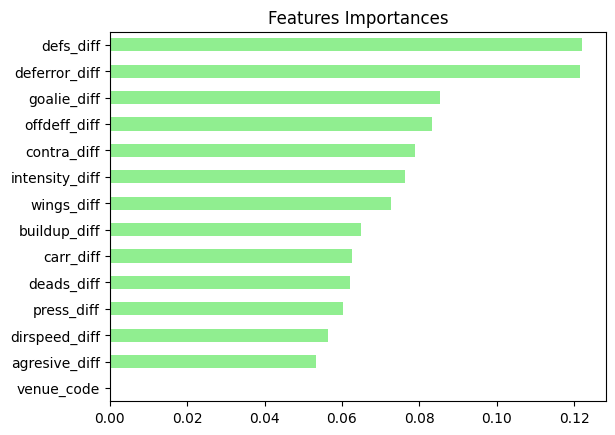

In [40]:
cols=full[from_ranked].columns
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_, index= cols)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [41]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict and print the label for the new data point X_new
y_pred = knn.predict(X_test)


In [42]:
#  Print the accuracy
print(knn.score(X_test, y_test))

#evaluating model

# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6272727272727273
[[44 13]
 [28 25]]
              precision    recall  f1-score   support

           0       0.61      0.77      0.68        57
           1       0.66      0.47      0.55        53

    accuracy                           0.63       110
   macro avg       0.63      0.62      0.62       110
weighted avg       0.63      0.63      0.62       110



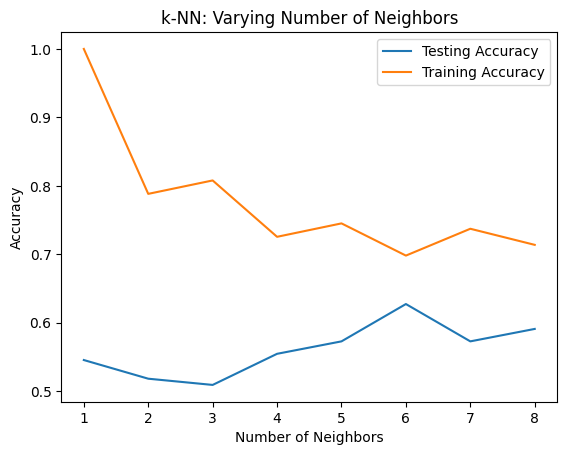

In [43]:
#how many neighbours
import numpy as np
import matplotlib.pyplot as plt
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [44]:
# Logistic Regression
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
# Import the necessary modules
from sklearn.linear_model import LogisticRegression


# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: knn_scaled
lreg = pipeline.fit(X_train, y_train)


# Compute and print metrics
print(lreg.score(X_test, y_test))

# Predict the labels of the test set: y_pred
y_pred = lreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# befroe rolling 0.7236842105263158
# [[110  24]
#  [ 39  55]]


0.6545454545454545
[[41 16]
 [22 31]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        57
           1       0.66      0.58      0.62        53

    accuracy                           0.65       110
   macro avg       0.66      0.65      0.65       110
weighted avg       0.66      0.65      0.65       110



In [45]:
# # import pickle
# # s = pickle.dumps(clf)
# # clf2 = pickle.loads(s)

# from joblib import dump, load
# dump(lreg, 'model71_2223hist2.joblib') 
# # lreg = load('model71_2223hist.joblib')

['model71_2223hist2.joblib']

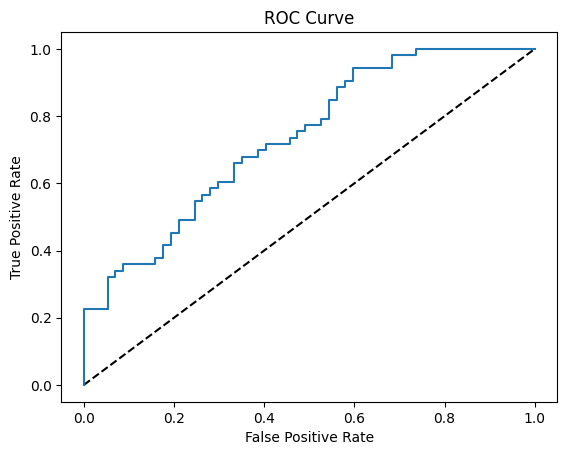

In [46]:
#ROC curve
import matplotlib.pyplot as plt

# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = lreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

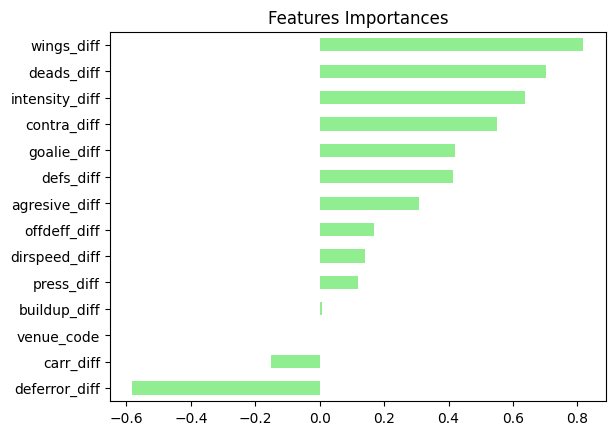

In [47]:
cols=full[from_ranked].columns
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances = pd.Series(data=lreg.steps[1][1].coef_[0], index= cols)[:25]

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [48]:
# GridSearch

# Setup the pipeline
steps = [('scaler', StandardScaler()),
        ('lreg', LogisticRegression())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
c_space = np.logspace(-5, 8, 15)
# parameters = {'lreg__C': c_space}
parameters = [    
    {'lreg__penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'lreg__C' : np.logspace(-4, 4, 20),
    # 'lreg__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    # 'lreg__max_iter' : [100, 1000,2500, 5000]
    }
]

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

# 0.75 {'lreg__C': 0.23357214690901212, 'lreg__penalty': 'l2'}

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\krawc\OneDrive\Docu

Accuracy: 0.6545454545454545
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        57
           1       0.66      0.58      0.62        53

    accuracy                           0.65       110
   macro avg       0.66      0.65      0.65       110
weighted avg       0.66      0.65      0.65       110

Tuned Model Parameters: {'lreg__C': 0.615848211066026, 'lreg__penalty': 'l2'}


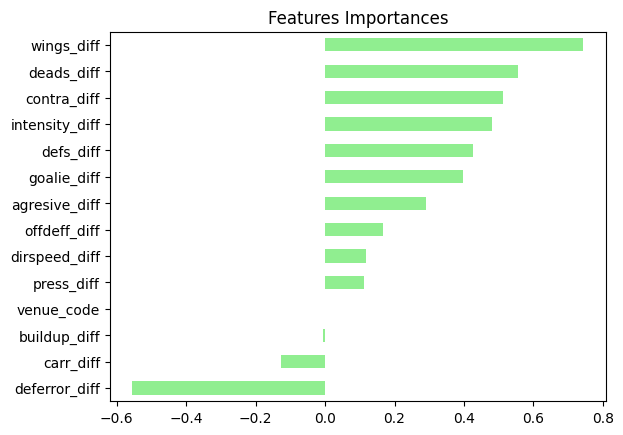

In [49]:
coefs=cv.best_estimator_.steps[1][1].coef_[0]
cols=cv.feature_names_in_
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances = pd.Series(data=coefs, index= cols)[:25]

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [50]:
#CART - Classification and Regression Trees 
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1, criterion='entropy') #, criterion='gini'

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

print(classification_report(y_test, y_pred))

Test set accuracy: 0.63
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        57
           1       0.70      0.40      0.51        53

    accuracy                           0.63       110
   macro avg       0.65      0.62      0.60       110
weighted avg       0.65      0.63      0.61       110



In [51]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)
# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=2)
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]



In [52]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.627


In [53]:
# 50 drzew z rozna bootsrapowana data glosuje -> tworzy sie 50 tych samych modeli dopasowanych do innej kombincji danych
# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1, oob_score=True)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

print(classification_report(y_test, y_pred))

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy: 0.636, OOB accuracy: 0.651
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        57
           1       0.67      0.49      0.57        53

    accuracy                           0.64       110
   macro avg       0.64      0.63      0.63       110
weighted avg       0.64      0.64      0.63       110



In [54]:
from sklearn.metrics import roc_auc_score
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=200, random_state=1)

# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)
# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ROC AUC score: 0.64


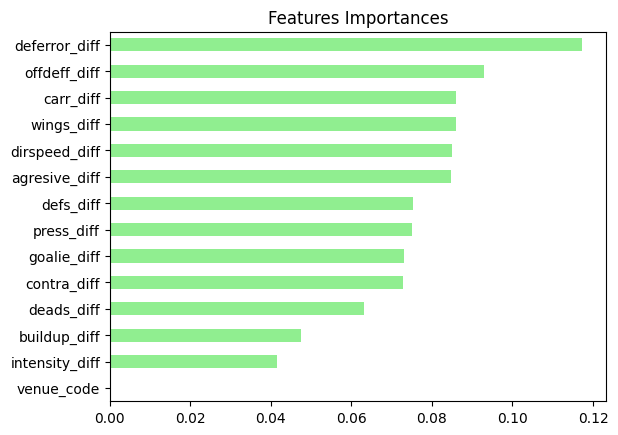

In [55]:
cols=full[from_ranked].columns
# Create a pd.Series of features importances
importances = pd.Series(data=ada.feature_importances_, index= cols)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\krawc\OneDrive\Documents\code\pythons\predictor\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\krawc\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\krawc\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_f

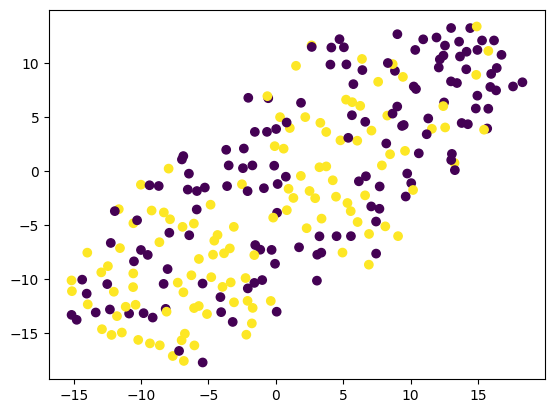

In [56]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X_train)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=y_train)
plt.show()

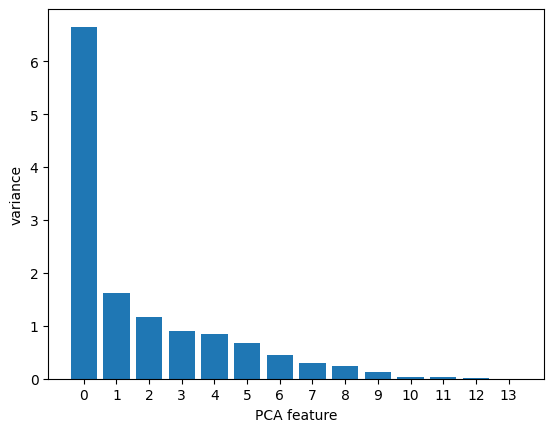

In [57]:
    # how many intrinsic dimensions

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(X_train)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [58]:
    # how many intrinsic dimensions you have to set n_components - idealy to intrinsic dimention

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA(n_components=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(X_train)

# Transform the scaled samples: pca_features
pca_features = pipeline.transform(X_train)

# Print the shape of pca_features
print(X_train.shape)
print(pca_features.shape)

# This information is included in the pca attribute: components_. As described in the documentation, 
# pca.components_ outputs an array of [n_components, n_features], 
# so to get how components are linearly related with the different features you have to:
#wychodzi na to ze PC sa skorelowane z kazdym feature i sa ich oszacowaniem, wiec nie wiadomo z ktorego zrezygnowac

feature_names=full[from_ranked].columns
# Dump components relations with features:
pd.DataFrame(pca.components_,columns=feature_names,index = ['PC1','PC2','PC3'])


(255, 14)
(255, 3)


,goalie_diff,defs_diff,offdeff_diff,intensity_diff,dirspeed_diff,deads_diff,press_diff,contra_diff,buildup_diff,carr_diff,wings_diff,agresive_diff,deferror_diff,venue_code
PC1,-0.266176,-0.293856,-0.268326,-0.375674,0.284307,0.377237,-0.292550,-0.227170,-0.346319,0.188912,0.292298,0.027159,0.165949,-0.0
PC2,-0.260216,0.104636,-0.244049,-0.047176,0.341965,0.068871,0.284924,0.172837,-0.118730,-0.429165,-0.374070,0.531880,0.075575,-0.0
PC3,-0.158585,-0.332176,-0.111214,0.069840,-0.129303,-0.017213,0.220600,0.420820,0.173592,0.185175,-0.088509,-0.200388,0.701485,-0.0


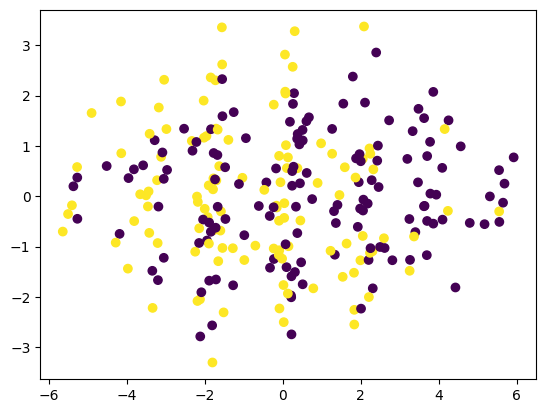

In [59]:
# Select the 0th feature: xs
xs = pca_features[:,0]

# Select the 1st feature: ys
ys = pca_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=y_train)
plt.show()

In [60]:
# X_train, X_test, y_train, y_test = train_test_split(full[from_ranked], full['target'], test_size=0.3, random_state=42)
X=full[from_ranked]
proba=lreg.predict_proba(X)[:,1]
pred=lreg.predict(X)

full=full[full.columns[:11]]
full['y_pred']=pred
full['y_prob']=proba
full


C:\Users\krawc\AppData\Local\Temp\ipykernel_7976\1638023051.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['y_pred']=pred
C:\Users\krawc\AppData\Local\Temp\ipykernel_7976\1638023051.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['y_prob']=proba


,opponent,team,date,time,round,day,venue,result,gf,ga,target,y_pred,y_prob
0,Arsenal,Aston Villa,2023-02-18,12:30:00,Matchweek 24,Sat,Home,L,2,4,0,0,0.345564
1,Arsenal,Bournemouth,2022-08-20,17:30:00,Matchweek 3,Sat,Home,L,0,3,0,0,0.131182
2,Arsenal,Brentford,2022-09-18,12:00:00,Matchweek 8,Sun,Home,L,0,3,0,0,0.262560
3,Arsenal,Brighton,2022-12-31,17:30:00,Matchweek 18,Sat,Home,L,2,4,0,0,0.260845
4,Arsenal,Chelsea,2022-11-06,12:00:00,Matchweek 15,Sun,Home,L,0,1,0,0,0.251139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,Wolves,Newcastle Utd,2023-03-12,16:30:00,Matchweek 27,Sun,Home,W,2,1,1,1,0.581634
361,Wolves,Nott'ham Forest,2023-04-01,15:00:00,Matchweek 29,Sat,Home,D,1,1,0,0,0.398441
362,Wolves,Southampton,2023-02-11,15:00:00,Matchweek 23,Sat,Home,L,1,2,0,0,0.353990
363,Wolves,Tottenham,2022-08-20,12:30:00,Matchweek 3,Sat,Home,W,1,0,1,1,0.743959


In [61]:
full.to_csv('match_w_pred_2223diff.csv')